# Library Usage in Seattle, 2005-2020

## Exploratory Data Analysis, Part I (item-based)

The data that is the basis for this project is the [Checkouts by Title (Physical Items)](https://data.seattle.gov/Community/Checkouts-By-Title-Physical-Items-/5src-czff) dataset from [Seattle Open Data](https://data.seattle.gov/). It was downloaded on December 15, 2020.

This notebook uses two datasets that were created in the [previous notebook](01_data_cleaning.ipynb), which I use to explore and analyze the types of items and the quantities of those items that were checked out from the Seattle Library system between 2005 and 2020.

*UPDATE*: I have since called the API (refer to [this notebook](0x_api_calls.ipynb)) to obtain the rest of the data for the year 2020. I then concatenated that data onto the final saved portion (what I have dubbed `seattle_lib_11.pkl`) of my very large DataFrame.

## Table of contents

1. [Import required packages](#Import-required-packages)
2. [Load data](#Load-data)
3. [Counts across categories](#Counts-across-categories)
    - [Format group](#Analysis-of-format_group)
    - [Format subgroup](#Analysis-of-format_subgroup)
    - [Category group](#Analysis-of-category_group)
    - [Age group](#Analysis-of-age_group)


4. [Most popular items](#Most-popular-items)
    - [Books](#Books)
    - [Music](#Music)
    - [Equipment](#Equipment)
    - [Other](#Other)
    
    
5. [Checkouts over time](#Checkouts-over-time)
    - [Check for missing values](#Check-for-missing-values)
    - [Investigate missing values](#Investigate-missing-values)
        - [Missing values by year](#Missing-values-by-year)
        - [Missing values by day of week](#Missing-values-by-day-of-week)
        - [Missing values by day of week and year](#Missing-values-by-day-of-week-and-year)
    - [Day of the week](#Day-of-the-week)
        - [Weekend](#Weekend)
        - [Holidays](#Holidays)
    - [2005-2020, overall](#2005-2020,-overall)
    - [2005-2020, yearly](#2005-2020,-yearly)
    - [Equipment](#Equipment)
    - [Print vs. Media](#Print-vs.-Media)
    
    
6. [Impute missing values](#Impute-missing-values)
7. [💾 Save/Load item counts DataFrame](#💾-Save/Load-item-counts-DataFrame)
8. [Next notebook: Modeling](#Next-notebook:-Modeling)

### Import required packages

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [1]:
# standard dataframe packages
import pandas as pd; pd.set_option('display.max_columns', 50)
import numpy as np

# graphing packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('ticks')

# time-related packages
import datetime
import holidays

# statistical packages
from scipy.stats import ttest_ind

# custom functions
from functions.data_cleaning import *

# saving packages
import gzip
import pickle

# reload functions/libraries when edited
%load_ext autoreload
%autoreload 2

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load data

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

I'll load both the complete item checkouts data, which was created in the [previous notebook](01_data_cleaning.ipynb). For EDA based on the time series data, refer to [this notebook](02_eda_time.ipynb).

*NOTE: Set `verbose=2` in the function below for more frequent status updates.*

#### ⏰ Cell below takes 20-25 minutes to run. ⏰

In [2]:
%%time

# uncomment to load complete item checkouts data
df_full = load_multi_df(
    'data/', 'seattle_lib_', 'pkl', 11, compression='gzip', verbose=1
)

Current time = 15:51:59
-----------------------
Begin load...

Current time = 16:15:58
-----------------------
Load complete!

CPU times: user 4min 46s, sys: 10min 33s, total: 15min 20s
Wall time: 24min 8s


In [3]:
# take a look
df_full.head()

,title,subjects,date,format_group,format_subgroup,category_group,age_group
0,Firewall,"Kidnapping Drama, Video recordings for the hea...",2008-02-13,Media,Video Disc,Fiction,Adult
1,Marley me,"Comedy films, Married people Drama, Philadelph...",2009-07-03,Media,Video Disc,Fiction,Adult
2,Six feet under The complete fourth season,"Video recordings for the hearing impaired, Pro...",2008-10-26,Media,Video Disc,Fiction,Adult
3,Doctor Who The next doctor,"London England Drama, Doctor Who Fictitious ch...",2010-11-10,Media,Video Disc,Fiction,Adult
4,School ties,"Antisemitism Drama, Video recordings for the h...",2008-12-28,Media,Video Disc,Fiction,Adult


In [4]:
# check shape
df_full.shape

(106581725, 7)

## Counts across categories

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In this section, I'll compare the number of checkouts across the various groups within the following columns:
- `format_group`
- `format_subgroup`
- `category_group`
- `age_group`

### Analysis of `format_group`

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [9]:
# raw counts
col_counts = df_full.format_group.value_counts()
col_counts

Print        59671991
Media        46639759
Other          200586
Equipment       69389
Name: format_group, dtype: int64

In [10]:
# as a percentage of the data
df_full.format_group.value_counts(normalize=True) * 100

Print        55.987076
Media        43.759621
Other         0.188199
Equipment     0.065104
Name: format_group, dtype: float64

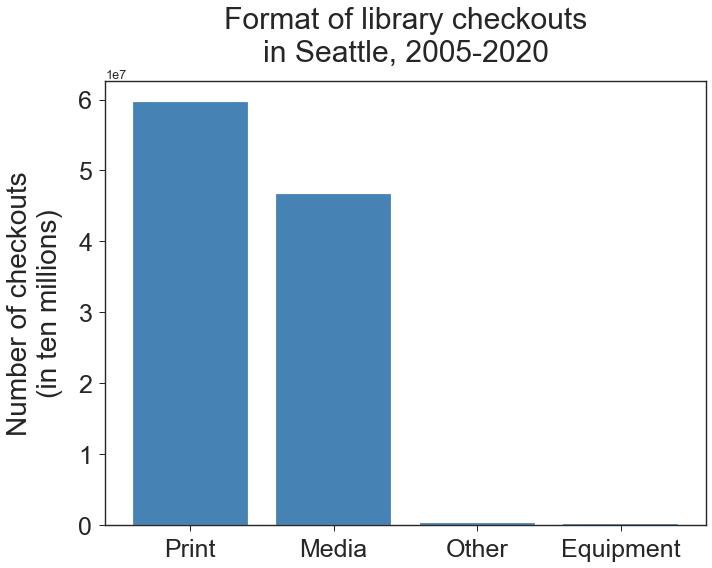

In [11]:
# create labels and prettify the plot
plt.figure(figsize=(10,8))
plt.title('Format of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
plt.suptitle('')
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/category_eda/format_group_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

### Analysis of `format_subgroup`

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [12]:
# raw counts
col_counts = df_full.format_subgroup.value_counts()
col_counts

Book              59473345
Video Disc        30303728
Audio Disc        11242969
Audiobook Disc     2696036
Video Tape         1474457
Kit                 695493
Audiobook Tape      240328
Music Score         130589
Audio Tape           45946
Folder               23901
Data Disc             9886
Periodical             624
Document               480
Art                    129
Film                    81
Name: format_subgroup, dtype: int64

In [13]:
# as a percentage of the data
df_full.format_subgroup.value_counts(normalize=True) * 100

Book              55.928595
Video Disc        28.497555
Audio Disc        10.572862
Audiobook Disc     2.535346
Video Tape         1.386576
Kit                0.654040
Audiobook Tape     0.226004
Music Score        0.122806
Audio Tape         0.043208
Folder             0.022476
Data Disc          0.009297
Periodical         0.000587
Document           0.000451
Art                0.000121
Film               0.000076
Name: format_subgroup, dtype: float64

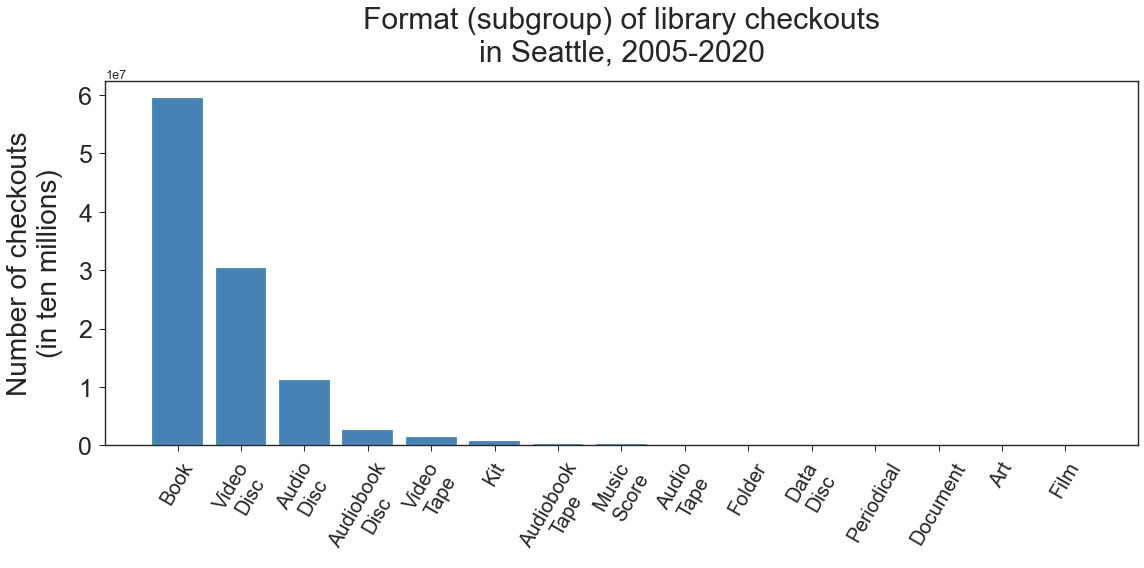

In [14]:
# create labels and prettify the plot
plt.figure(figsize=(16,8))
plt.title('Format (subgroup) of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)

# prettify the x tick labels
labels_pretty = [label.replace(' ', '\n') for label in list(col_counts.index)]
plt.xticks(ticks=range(len(col_counts)), labels=labels_pretty, fontsize=20, rotation=60)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/category_eda/format_subgroup_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

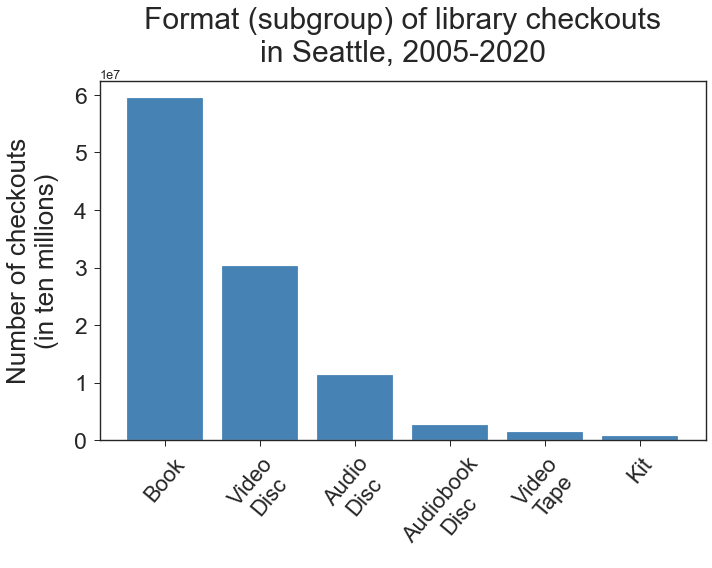

In [15]:
# top 6
col_counts = df_full['format_subgroup'].value_counts().head(6)

# create labels and prettify the plot
plt.figure(figsize=(10,8))
plt.title('Format (subgroup) of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=26, labelpad=15)
plt.yticks(fontsize=23)

# prettify the x tick labels
labels_pretty = [label.replace(' ', '\n') for label in list(col_counts.index)]
plt.xticks(ticks=range(len(col_counts)), labels=labels_pretty, fontsize=22, rotation=50)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/category_eda/format_subgroup_counts_top6.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Unsurprisingly, books make up the majority of physical items checked out at Seattle libraries, followed by movies and CDs.
- I would have guessed that audiobooks made up a larger portion of checkouts, but they only account for about 2.5% of the data.

### Analysis of `category_group`

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [16]:
# raw counts
col_counts = df_full.category_group.value_counts()
col_counts

Fiction              65339847
Nonfiction           37566928
Other                 1742414
Language              1681662
Interlibrary Loan      193066
Reference               57420
Name: category_group, dtype: int64

In [17]:
# as a percentage of the data
df_full.category_group.value_counts(normalize=True) * 100

Fiction              61.305149
Nonfiction           35.247192
Other                 1.634821
Language              1.577820
Interlibrary Loan     0.181144
Reference             0.053874
Name: category_group, dtype: float64

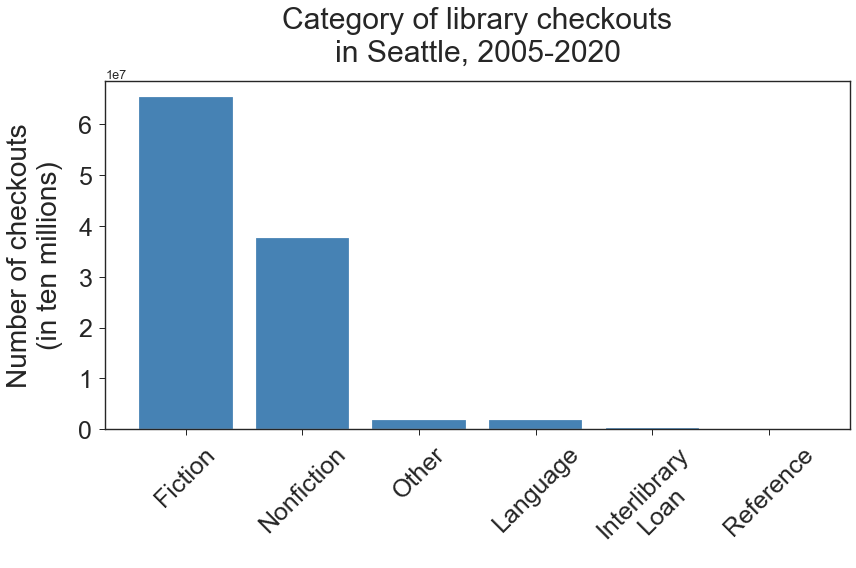

In [18]:
# prettify the plot
plt.figure(figsize=(12,8))
plt.title('Category of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
# plt.xlabel('Category', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)

# prettify the x tick labels
labels_pretty = [label.replace(' ', '\n') for label in list(col_counts.index)]
plt.xticks(ticks=range(6), labels=labels_pretty, fontsize=25, rotation=45)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/category_eda/category_group_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

### Analysis of `age_group`

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [19]:
# raw counts
col_counts = df_full.age_group.value_counts()
col_counts

Adult       71639168
Juvenile    31030337
Teen         3912220
Name: age_group, dtype: int64

In [20]:
# as a percentage of the data
df_full.age_group.value_counts(normalize=True) * 100

Adult       67.215245
Juvenile    29.114125
Teen         3.670629
Name: age_group, dtype: float64

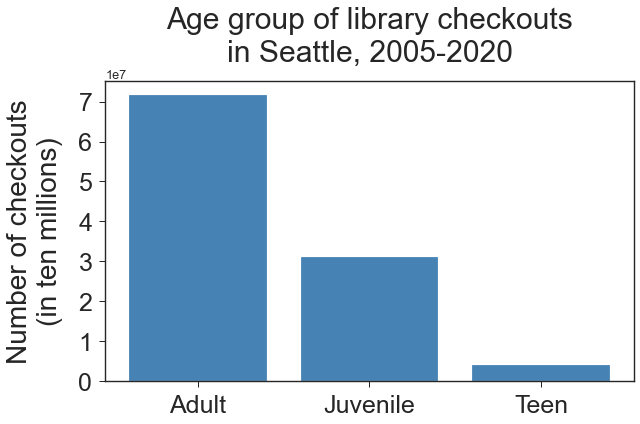

In [21]:
# prettify the plot
plt.figure(figsize=(9,6))
plt.title('Age group of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/category_eda/age_group_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Two-thirds of checkouts are of `Adult` items, about one-third are `Juvenile` or kid's items.
- `Teen` items make up less than 4% of the data, which makes sense, given that `Teen` is such a specific age group with a fairly small range.
    - Is there a chance that teenagers think libraries are uncool? Impossible to tell with this data.

## Most popular items

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

#### ⏰ Cell below takes ~1.5 minutes to run. ⏰

In [22]:
%%time

# top 50 stats
df_full.title.value_counts().head(50)

CPU times: user 52.3 s, sys: 28 s, total: 1min 20s
Wall time: 1min 36s


Greatest hits                                73932
SPL HotSpot connecting Seattle               34395
Into the wild                                25158
Uncataloged Folder or Bag BAL                22608
Uncataloged Folder or Bag DWN                22505
Harry Potter and the half blood prince       22400
Where the wild things are                    21368
Twilight                                     21366
golden compass                               20867
kite runner                                  20864
Harry Potter and the sorcerers stone         19892
No country for old men                       19785
FlexTech Laptops                             19577
Cinderella                                   19574
Harry Potter and the Order of the Phoenix    19073
reader                                       18941
hunger games                                 17710
Atonement                                    17479
Harry Potter and the goblet of fire          17460
Uncataloged Folder or Bag GWD  

Perhaps unsurprisingly, the top 50 titles are mostly comprised of items that are both books and movies, as well as more generic terms such as `Greatest hits`; thus, I will have to perform a closer look at each format type and some specific items.

#### Important notes:
- Equipment plays a large role in Seattle's libraries, namely `SPL HotSpot connecting Seattle`, `FlexTech Laptops`, and `In Building Device Checkout`
    - Perhaps analyzing this across time can lead to further insights
    - Libraries play a large role in folks accessing the internet
- Several items are marked as `Uncataloged Folder or Bag`, followed by the code for whichever branch they are a part of; perhaps more investigation will be necessary here
- `Michael Clayton` appears to be the top item for items that are only either a book or a movie, not both
    - Followed by `Burn After Reading` and `Darjeeling Limited`
- All but the final `Harry Potter` book/movie appear on the list, which may be due to the fact that:
    - as a book, it came out in July 2007 (after the start date of this data)
    - as a movie, and perhaps more importantly as far as this data is concerned, it is actually split into *two* movies, unlike the other books/movies in the series
    
    
### Books

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

#### Top 25 Books Overall

#### ⏰ My computer must have been having a conniption on the most recent run-through, because usually the cell below takes ~3 minutes to run. ⏰

In [23]:
%%time

# top 25 stats
top25_books = df_full[df_full.format_subgroup == 'Book'].title.value_counts().head(25)

# take a look
top25_books

CPU times: user 1min 56s, sys: 7min 4s, total: 9min
Wall time: 16min 51s


Dinosaurs                                 11223
Educated a memoir                         10975
Where the wild things are                 10631
Green eggs and ham                         9942
very hungry caterpillar                    9929
Are you ready to play outside              9840
Snow                                       9620
Whered you go Bernadette a novel           9601
Chicka chicka boom boom                    9573
There is a bird on your head               9460
cat in the hat                             9252
Harry Potter and the half blood prince     9234
Go dog go                                  9197
My friend is sad                           9137
Pigs make me sneeze                        9126
Today I will fly                           8999
Goldilocks and the three bears             8949
Bob books fun                              8912
I love my new toy                          8854
Frog and Toad are friends                  8810
Giggle giggle quack                     

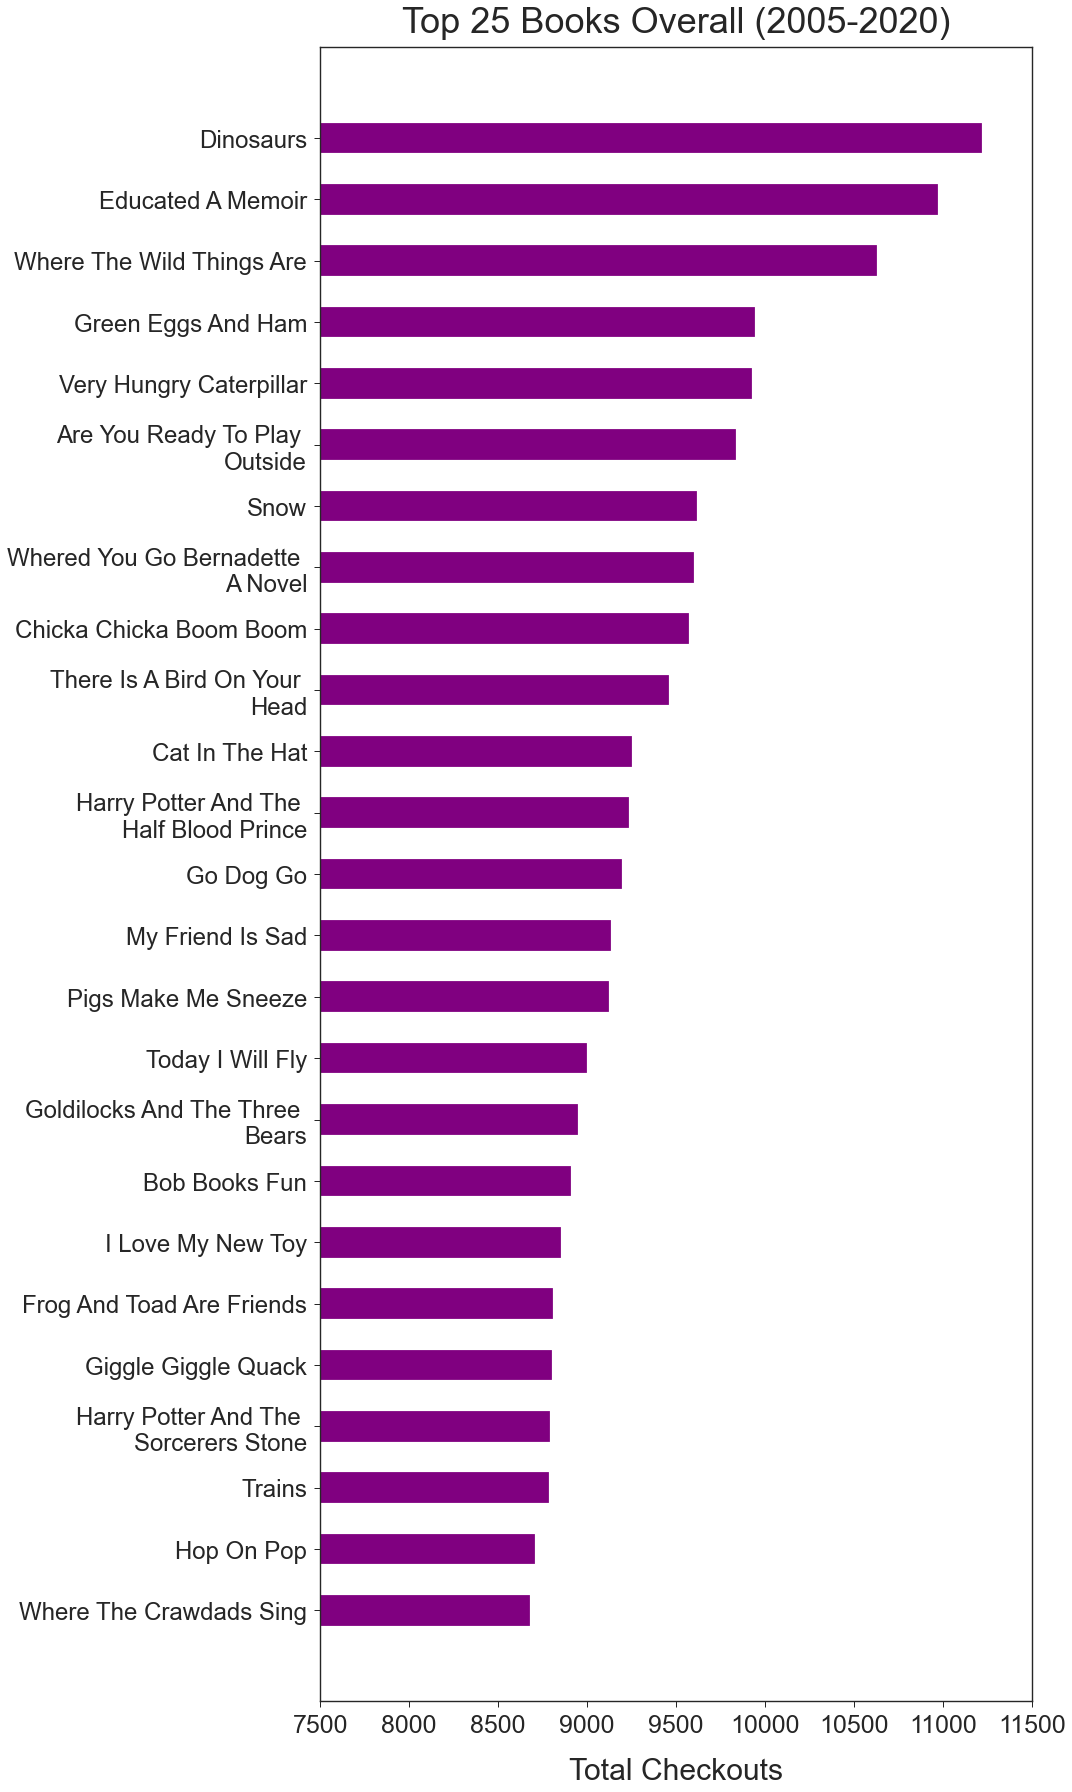

In [24]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books Overall (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=7500, right=11500)

# plot top 25 books
plt.barh([name_beautifier(x) for x in top25_books.index][::-1], top25_books.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/popular_items_eda/top25_books_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Other than `Educated` and `Where'd you go, Bernadette?`, all of these books are in the `Juvenile` age group, i.e. children's books.
    - While this does point to the fact that libraries are integral resources for young readers, it may also suggest that there are simply fewer (and possibly less diverse) options among `Juvenile` books.
    - By the time readers reach a certain age, they presumably have a wide variety of interests as well as many more books to choose from, so library activity gets spread out among a larger population of books.

- Simply put, this does not prove anything about who uses the library the most, but merely which items see the most activity. It is also worth pointing out that many of these can be read in a day, which increases turnover or the ability to change hands quickly and be checked out often.

- I'll now break this down by age group and fiction/nonfiction books.

#### Top 25 Books - Adult

In [25]:
%%time

# top 25 stats
top25_books_adult = df_full[(df_full.format_subgroup == 'Book') &
                            (df_full.age_group == 'Adult')].title.value_counts().head(25)

# take a look
top25_books_adult

CPU times: user 22.7 s, sys: 20 s, total: 42.8 s
Wall time: 54.9 s


Educated a memoir                                                                            10975
Whered you go Bernadette a novel                                                              9601
Where the crawdads sing                                                                       8678
Becoming                                                                                      8431
omnivores dilemma a natural history of four meals                                             7759
help                                                                                          7675
All the light we cannot see a novel                                                           7628
Gone girl a novel                                                                             7498
girl with the dragon tattoo                                                                   7403
Quiet the power of introverts in a world that cant stop talking                               7363
Never let 

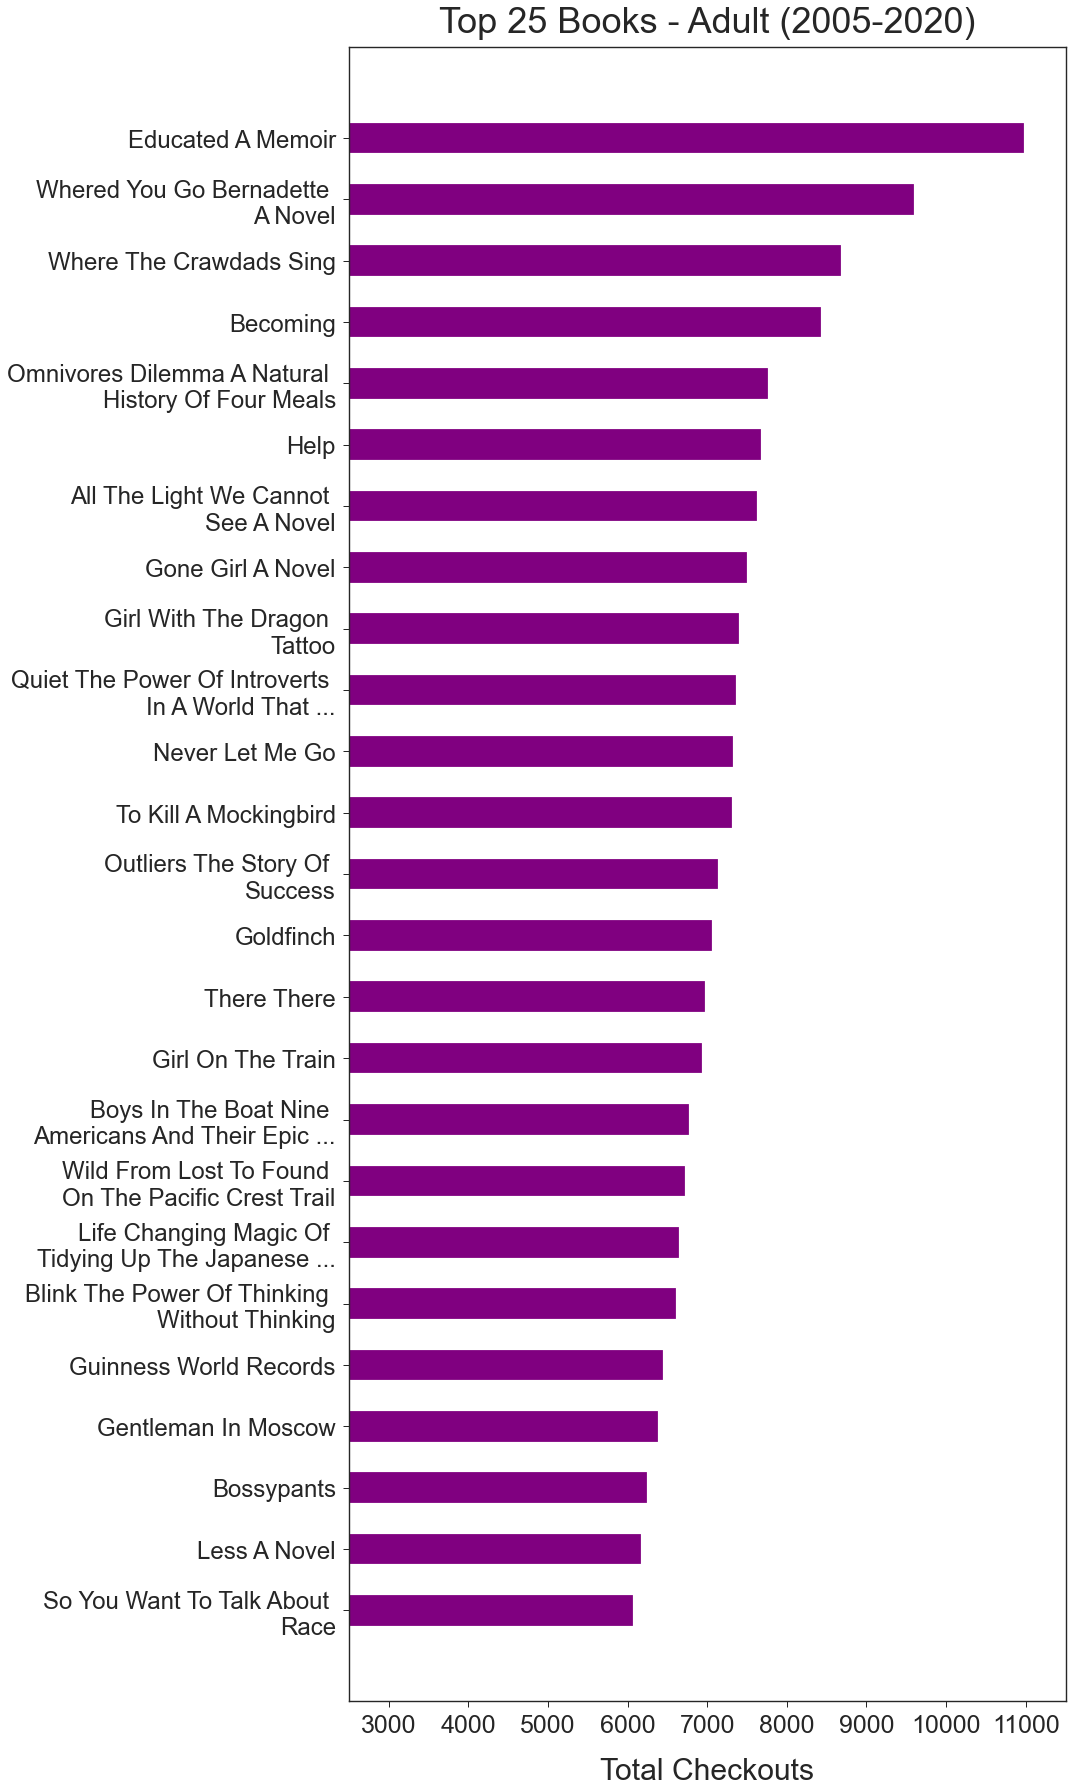

In [26]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Adult (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 adult books
plt.barh([name_beautifier(x) for x in top25_books_adult.index][::-1],
         top25_books_adult.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/popular_items_eda/top25_books_adult_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- 7 out of the top 10 are female authors.
    - 14 out of 25 female authors, 10 out of 25 male authors, and 1 anthology (`Guinness Book of World Records`).
    - Again, it is impossible to determine whether this means females are more active than males at the library, for a variety of reasons, not least of which is that the gender of the author does not directly correlate with the the gender of the reader.
- Malcolm Gladwell appears on here twice, the only author to do so (`Outliers` and `Blink`).
- I'd like to further break this down into fiction and nonfiction. It appears that both are fairly well represented in this list:
    - 13 out of 25 are `Fiction`.
    - 12 out of 25 are `Nonfiction`.
- After the top 4, there is a fairly narrow range of the number of checkouts.

#### Top 25 Books - Teen

In [27]:
%%time

# top 25 stats
top25_books_teen = df_full[(df_full.format_subgroup == 'Book') &
                           (df_full.age_group == 'Teen')].title.value_counts().head(25)

# take a look
top25_books_teen

CPU times: user 7.37 s, sys: 4.1 s, total: 11.5 s
Wall time: 14 s


hunger games                                   8609
book thief                                     8438
Catching fire                                  7870
Mockingjay                                     7839
absolutely true diary of a part time Indian    7782
fault in our stars                             6508
Twilight                                       5833
Divergent                                      4797
New moon                                       4779
perks of being a wallflower                    4086
Eclipse                                        4038
graveyard book                                 3758
Breaking dawn                                  3716
catcher in the rye                             3609
Insurgent                                      3429
Uglies                                         3405
Eleanor Park                                   3378
maze runner                                    3346
Bone Vol 1 Out from Boneville                  3320
Allegiant   

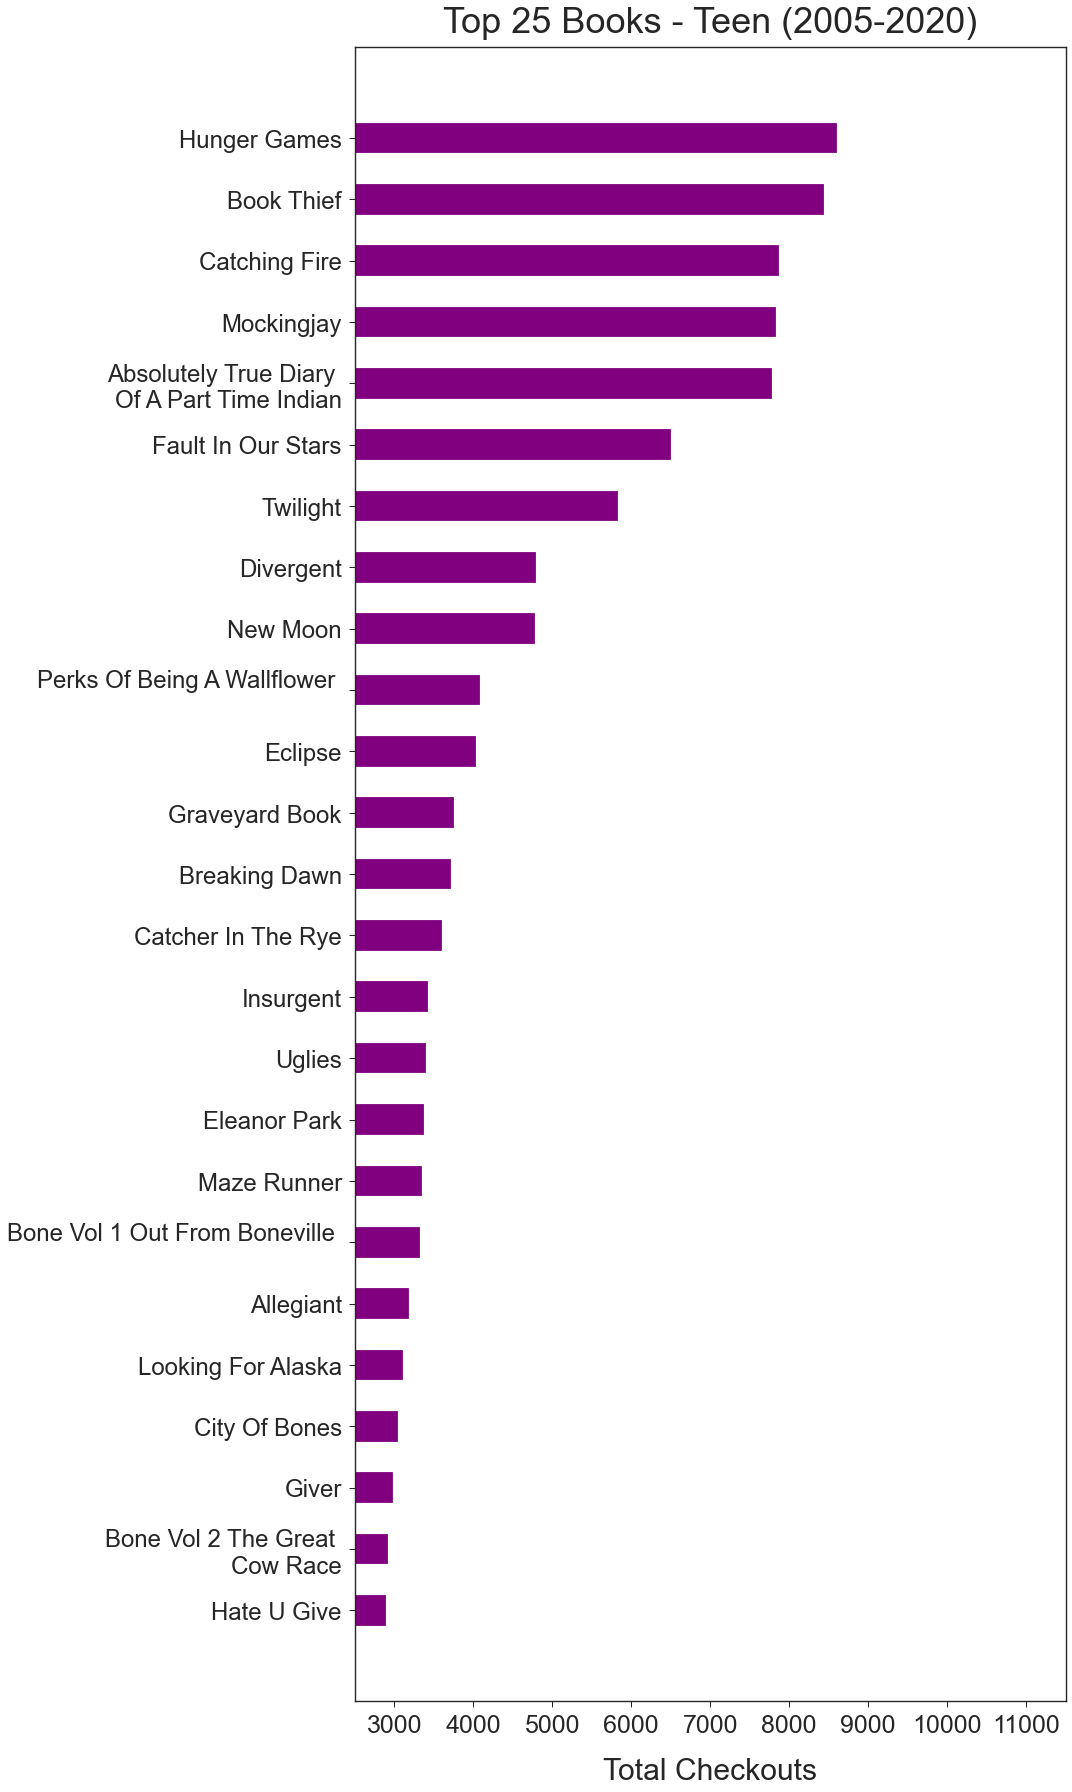

In [28]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Teen (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 teen books
plt.barh([name_beautifier(x) for x in top25_books_teen.index][::-1],
         top25_books_teen.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/popular_items_eda/top25_books_teen_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Not too many surprises here, with the Twilight and Hunger Games series dominating.
- A couple of John Green's books make the list (`The Fault in Our Stars` and `Looking for Alaska`).
- In my opinion, `Catcher in the Rye` is a bit of an edge case; it makes sense to me that it is classified as `Teen`, although I'm sure a fair amount of adults read it as well, although I suppose that can be said of most of these. I guess it's probably a lot of folks who forgot to read it in school and wanted to see what the hubbub was about.
- Sherman Alexie makes the list! with `The Absolutely True Diary of a Part-Time Indian`.
- I was expecting more comic books and graphic novels, but that distinction is held only by the the first two installations of the `Bone` comic books.
- Alas, no poetry.
- After the top 5, there is a notably steep decline in the popularity of the rest of the items on the list.

#### Top 25 Books - Juvenile (Children's Books)

In [29]:
%%time

# top 25 stats
top25_books_kids = df_full[(df_full.format_subgroup == 'Book') &
                           (df_full.age_group == 'Juvenile')].title.value_counts().head(25)

# take a look
top25_books_kids

CPU times: user 15 s, sys: 19.6 s, total: 34.7 s
Wall time: 48.6 s


Dinosaurs                                 11089
Where the wild things are                 10631
Green eggs and ham                         9942
very hungry caterpillar                    9928
Are you ready to play outside              9840
Chicka chicka boom boom                    9572
There is a bird on your head               9460
cat in the hat                             9252
Go dog go                                  9197
Harry Potter and the half blood prince     9177
My friend is sad                           9137
Pigs make me sneeze                        9119
Today I will fly                           8999
Goldilocks and the three bears             8922
Bob books fun                              8912
I love my new toy                          8854
Frog and Toad are friends                  8810
Giggle giggle quack                        8805
Trains                                     8789
Hop on Pop                                 8708
I will surprise my friend               

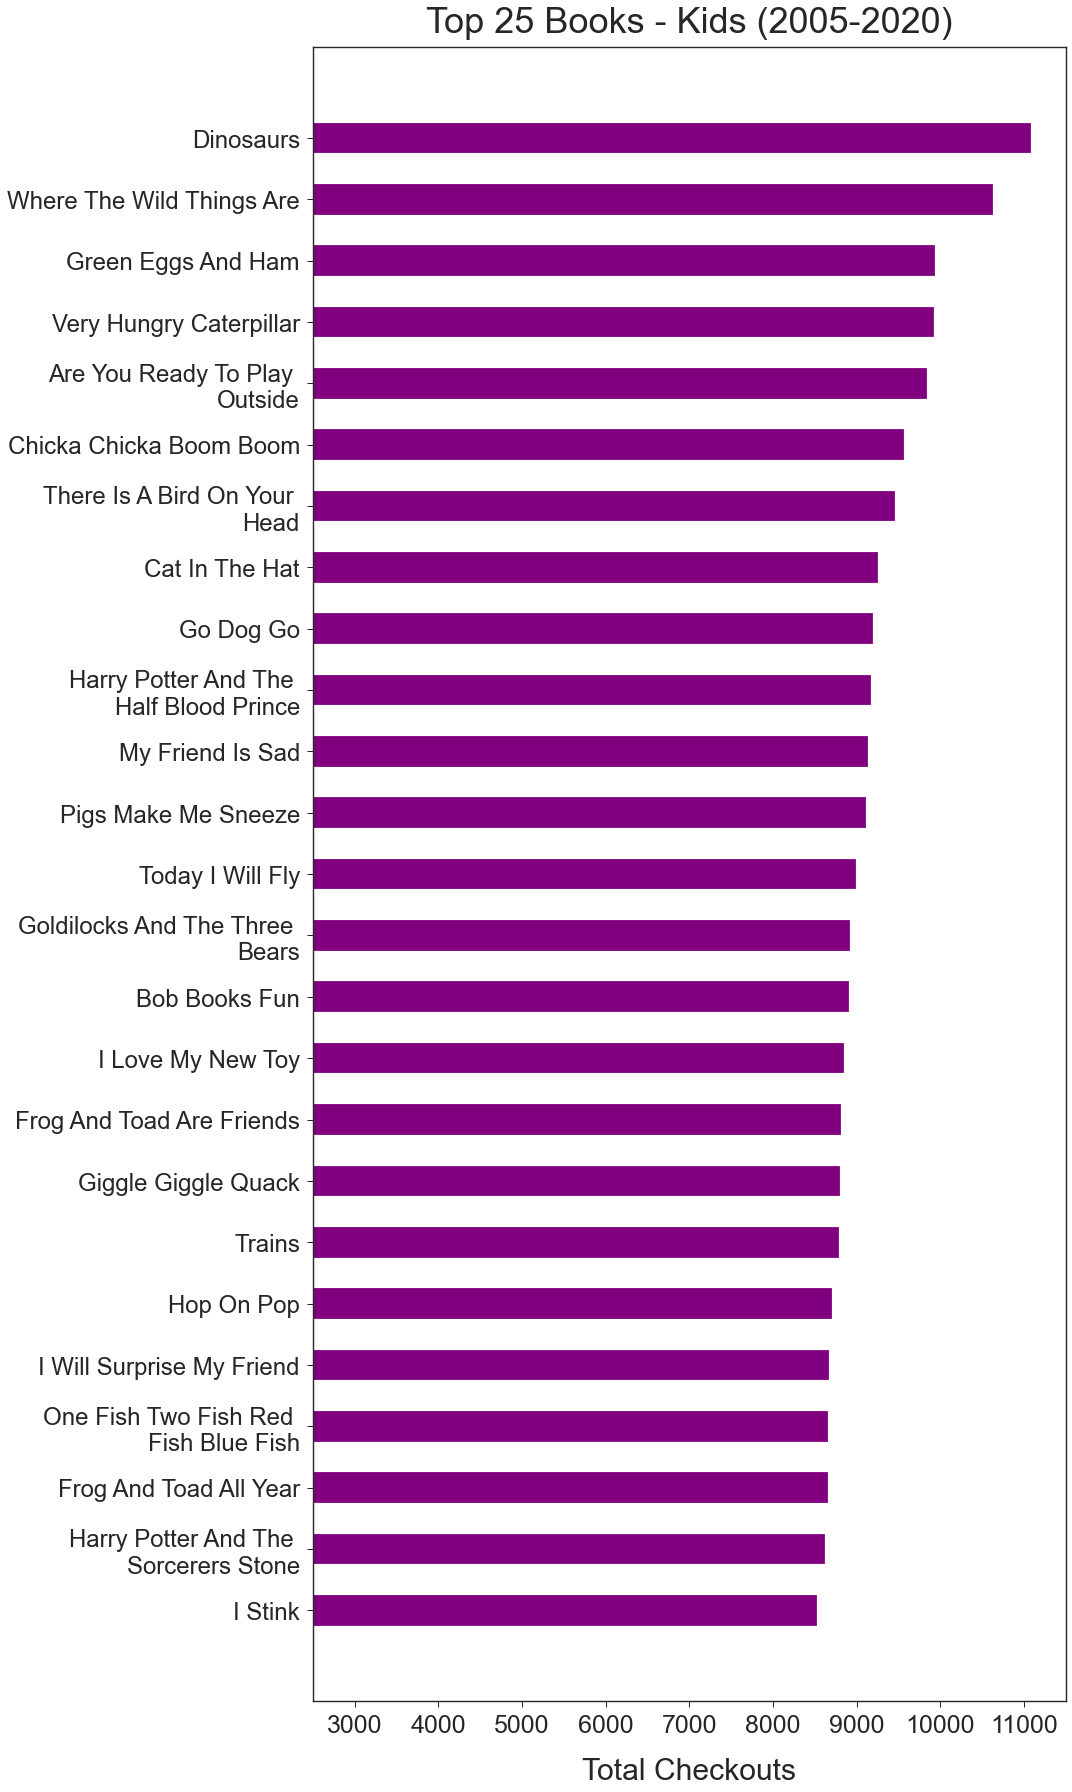

In [30]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Kids (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 kids books
plt.barh([name_beautifier(x) for x in top25_books_kids.index][::-1],
         top25_books_kids.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/popular_items_eda/top25_books_kids_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- It's unclear to me if `Dinosaurs` refers to a single book or if it is a series that is lumped together into a single title. My guess is it one of those larger, rather thin picture books.
- Harry Potter faces some stiff competition!
    - And I'm surprised that `The Half-Blood Prince` is the most checked out book in the series.
- Unsurprisingly, Dr. Seuss is well represented.
- Compared to `Adult` and `Teen` books, children's books have a much tighter range toward that top spot.
    - A possible reason for this is that they are such quick reads that they can either be re-read (re-checked out) numerous times or read alongside numerous other books within one trip to the library.

#### Top 25 Books - Adult Fiction

In [31]:
%%time

# top 25 stats
top25_books_adult_fiction = df_full[
                                        (df_full.format_subgroup == 'Book') &
                                        (df_full.age_group == 'Adult') &
                                        (df_full.category_group == 'Fiction')
                                ].title.value_counts().head(25)

# take a look
top25_books_adult_fiction

CPU times: user 18.1 s, sys: 10.4 s, total: 28.4 s
Wall time: 34.9 s


Whered you go Bernadette a novel                   9601
Where the crawdads sing                            8678
help                                               7675
All the light we cannot see a novel                7572
Gone girl a novel                                  7498
girl with the dragon tattoo                        7347
Never let me go                                    7324
To kill a mockingbird                              7310
goldfinch                                          7066
There there                                        6966
girl on the train                                  6940
gentleman in Moscow                                6384
Less a novel                                       6152
Pachinko                                           6037
Hotel on the corner of bitter and sweet a novel    6006
thousand splendid suns                             5971
overstory a novel                                  5955
kite runner                                     

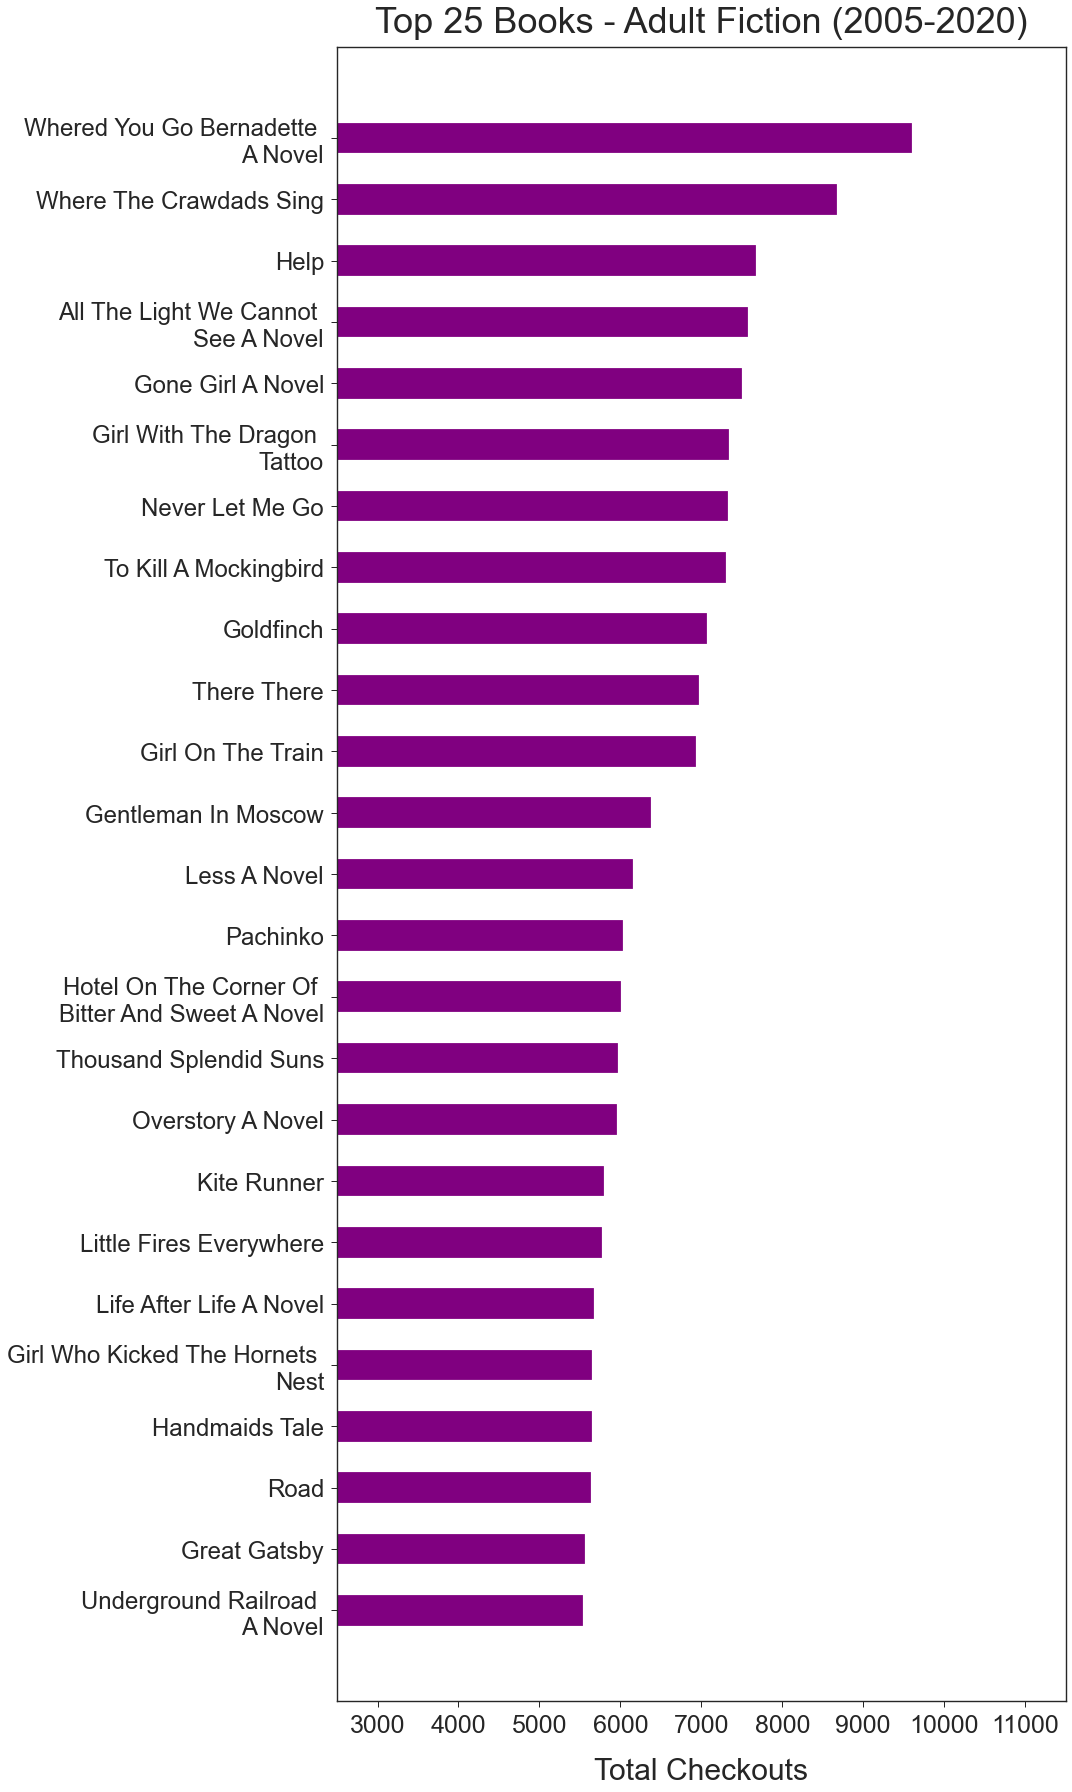

In [32]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Adult Fiction (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 kids books
plt.barh([name_beautifier(x) for x in top25_books_adult_fiction.index][::-1],
         top25_books_adult_fiction.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/popular_items_eda/top25_books_adult_fiction_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Lots of `Fiction` books appears to love calling attention to the fact that it is a novel.
- A fair amount of books from within series, as well as books that have either been turned into tv shows or movies.
    - Are they movies/shows because they were already popular as books? Or did movies/shows make them more popular as books? or both?
- A couple of classics, thinking specifically of `To Kill a Mockingbird` and ` The Great Gatsby`.

#### Top 25 Books - Adult Nonfiction

In [33]:
%%time

# top 25 stats
top25_books_adult_nonfiction = df_full[
                                        (df_full.format_subgroup == 'Book') &
                                        (df_full.age_group == 'Adult') &
                                        (df_full.category_group == 'Nonfiction')
                                    ].title.value_counts().head(25)

# take a look
top25_books_adult_nonfiction

CPU times: user 18.4 s, sys: 11 s, total: 29.5 s
Wall time: 34.2 s


Educated a memoir                                                                                                                           10752
Becoming                                                                                                                                     8375
omnivores dilemma a natural history of four meals                                                                                            7618
Quiet the power of introverts in a world that cant stop talking                                                                              7271
Outliers the story of success                                                                                                                6934
boys in the boat nine Americans and their epic quest for gold at the 1936 Berlin Olympics                                                    6757
Wild from lost to found on the Pacific Crest Trail                                                                          

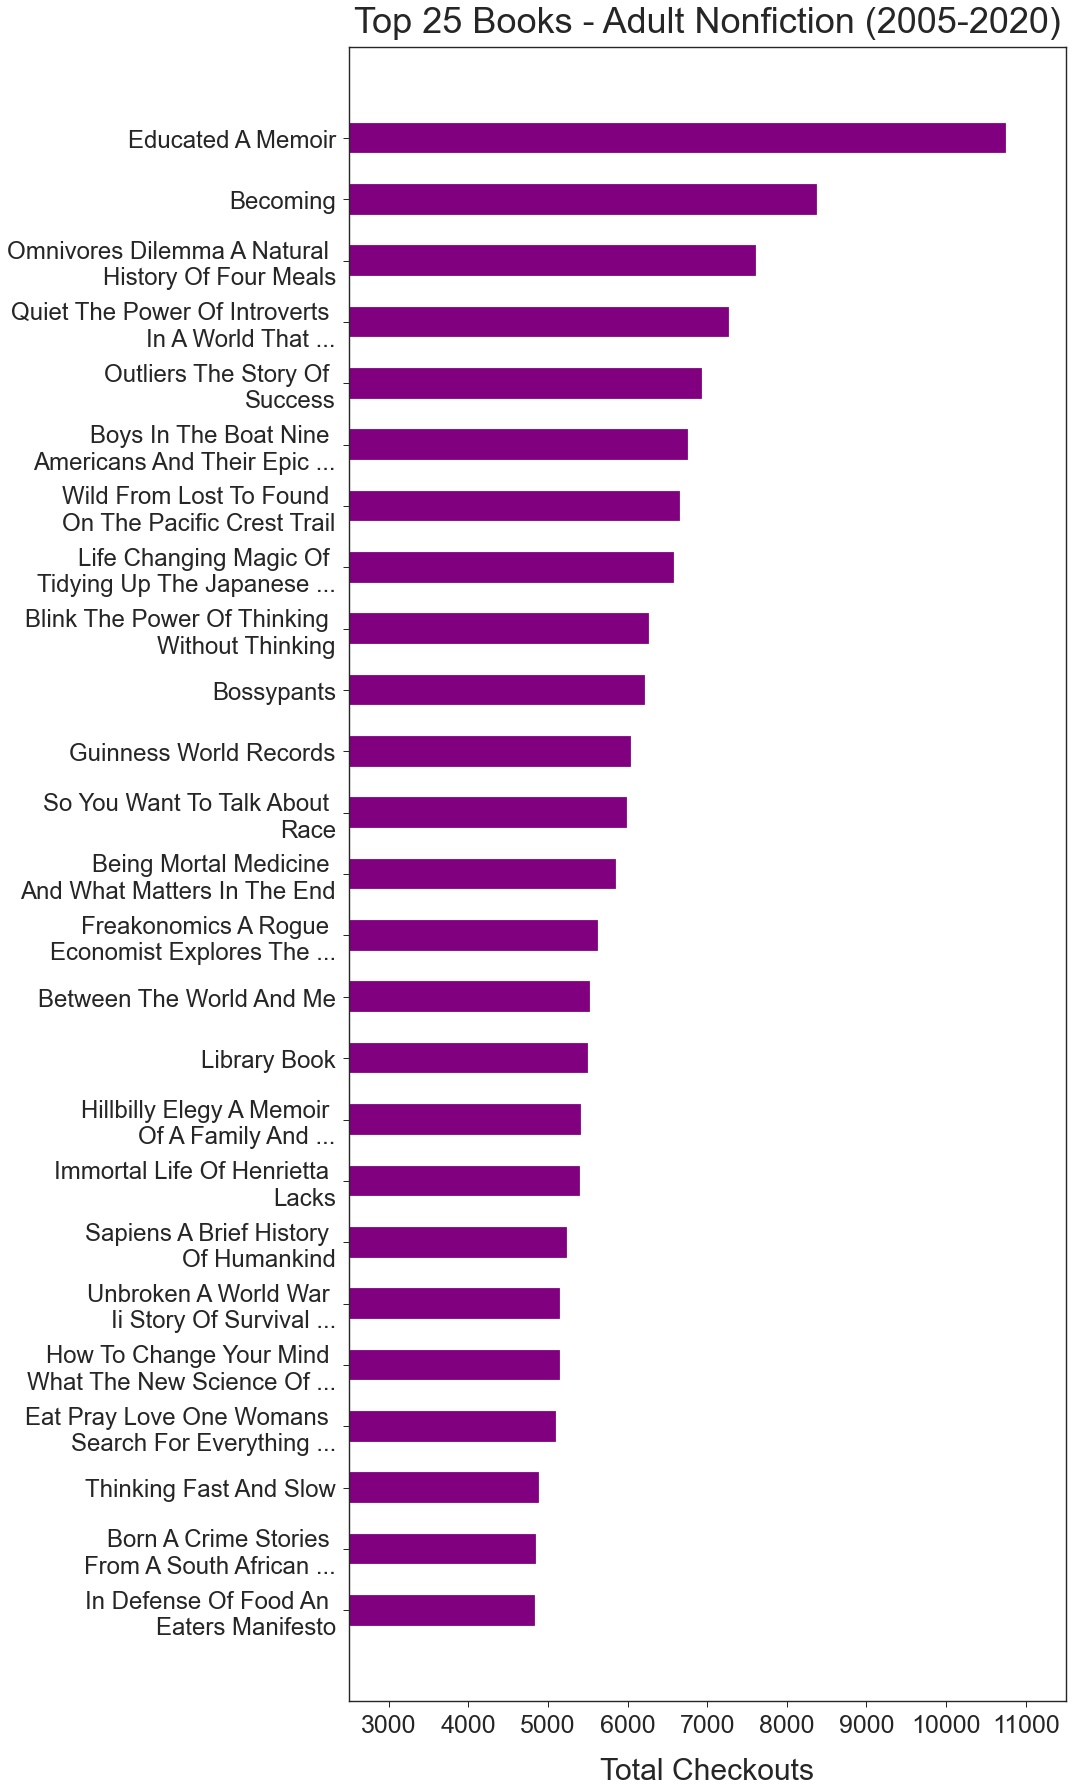

In [34]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Adult Nonfiction (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 kids books
plt.barh([name_beautifier(x) for x in top25_books_adult_nonfiction.index][::-1],
         top25_books_adult_nonfiction.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/popular_items_eda/top25_books_adult_nonfiction_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Lots of memoirs.
- Unsurprisingly, Marie Kondo makes the list! and Michael Pollan defeats Malcolm Gladwell by being on the list three times.
- I am intrigued by the book known as `Library Book`. It may just be a catchall title and not refer to any particular book.
- A couple of comedians (Tiny Fey and Trevor Noah) have popular nonfiction books.

#### Audiobooks

In [35]:
%%time

# top 25 stats
top25_audiobooks = df_full[(df_full.format_subgroup == 'Audiobook Disc') |
                           (df_full.format_subgroup == 'Audiobook Tape')].title.value_counts().head(25)

# take a look
top25_audiobooks

CPU times: user 10.1 s, sys: 3.61 s, total: 13.7 s
Wall time: 15.6 s


Pimsleur language programs Spanish 1 A the complete course                     6133
Harry Potter and the half blood prince                                         4395
Pimsleur language programs Spanish 1 B the complete course                     4230
Harry Potter and the sorcerers stone                                           3961
Harry Potter and the deathly hallows                                           3671
Spanish Latin American the short course                                        3594
Harry Potter and the chamber of secrets                                        3359
Pimsleur language programs French I A the complete course                      3228
Harry Potter and the Order of the Phoenix                                      3006
Pimsleur language programs Spanish II A the complete course                    2941
Harry Potter and the goblet of fire                                            2901
When you are engulfed in flames                                             

- Lots of language tapes, mostly of the Spanish variety.
- As I suspected, Harry Potter is a huge presence here.
- Shout out to David Sedaris, although I'm surprised that that is the particular audiobook that made the list.

### Movies

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

#### Top 25 movies overall

#### ⏰ Cell below takes ~1 minute to run. ⏰

In [36]:
%%time

# top 25 stats
top25_movies = df_full[df_full.format_subgroup == 'Video Disc'].title.value_counts().head(25)

# take a look
top25_movies

CPU times: user 15.9 s, sys: 24.7 s, total: 40.7 s
Wall time: 57.7 s


Into the wild                      19012
Michael Clayton                    17336
Burn after reading                 17050
Darjeeling Limited                 16482
Atonement                          16365
No country for old men             16286
reader                             16152
Doubt                              16134
Vicky Cristina Barcelona           15819
other Boleyn girl                  15664
Juno                               15572
curious case of Benjamin Button    15289
Slumdog millionaire                15257
WALL E                             14996
Gone baby gone                     14663
Milk                               14424
Savages                            14176
Once                               14128
Charlie Wilsons war                13865
Rachel getting married             13799
Becoming Jane                      13729
Mamma mia                          13715
golden compass                     13663
kite runner                        13541
Quantum of solac

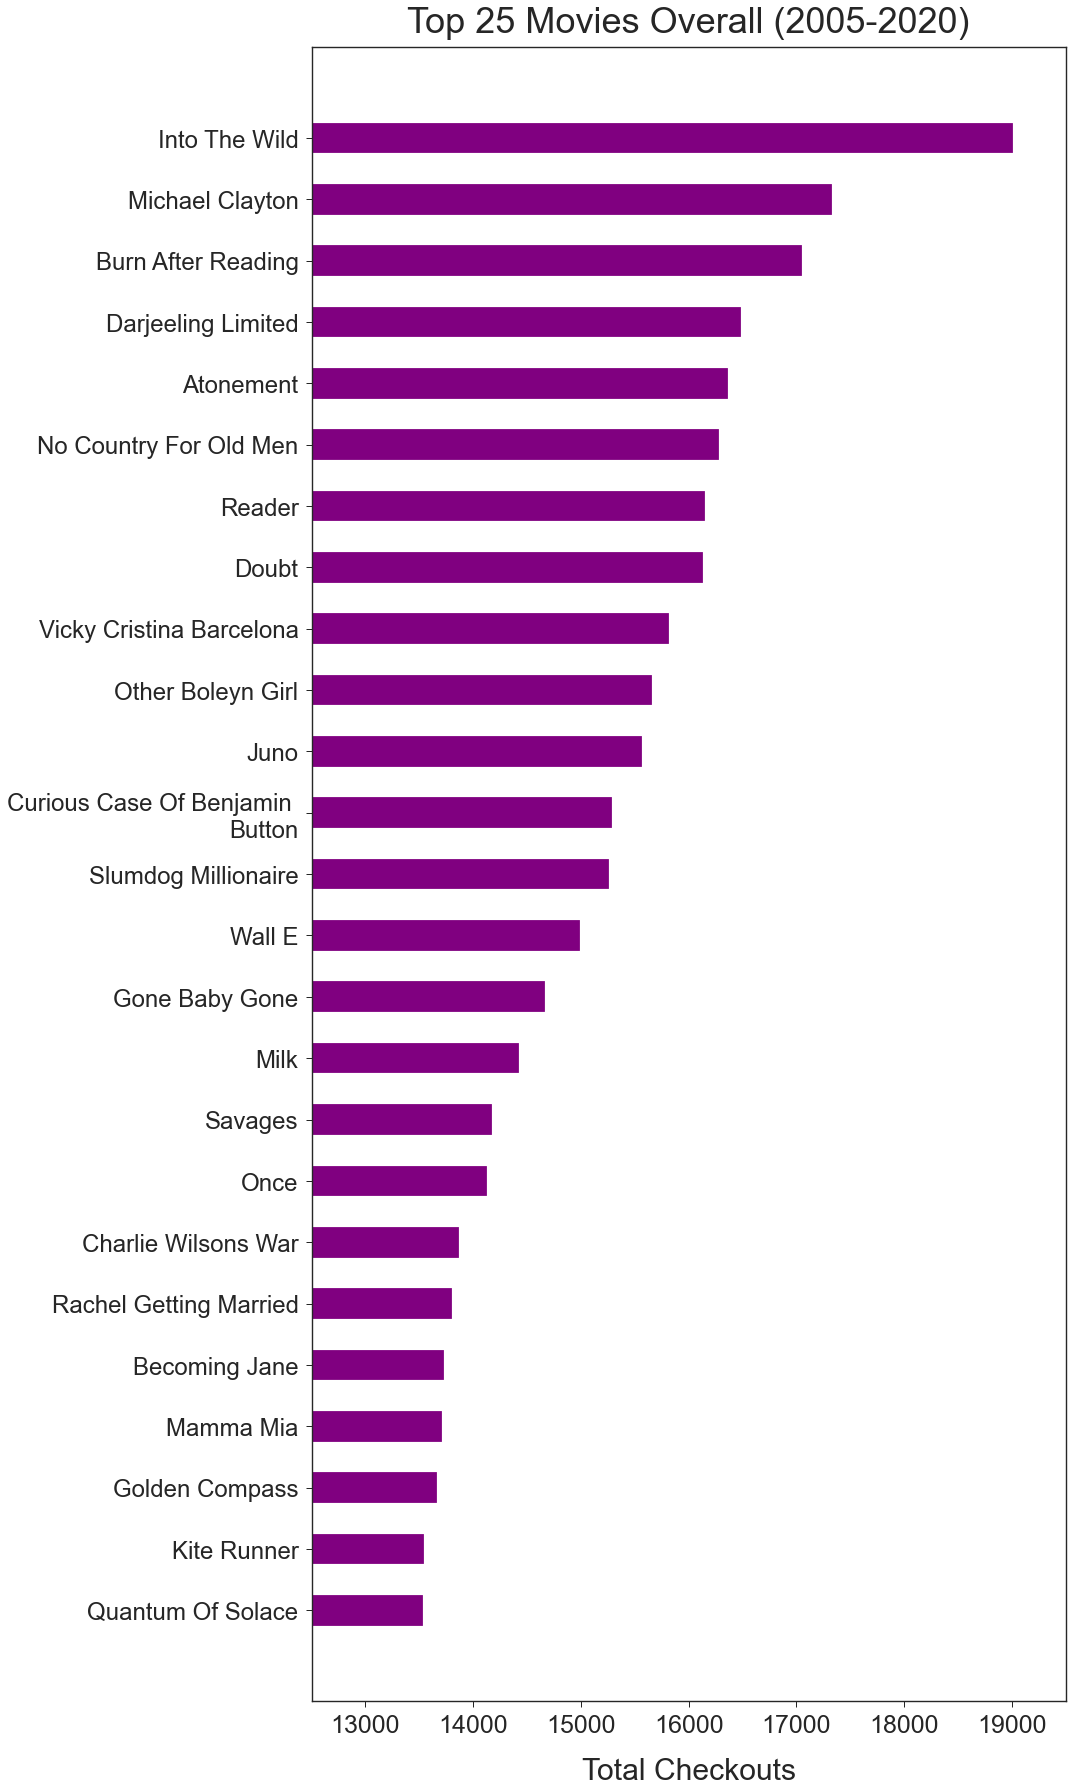

In [37]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Movies Overall (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=12500, right=19500)

# plot top 25 books
plt.barh([name_beautifier(x) for x in top25_movies.index][::-1], top25_movies.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/popular_items_eda/top25_movies_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

#### Top 10 kid's movies

In [38]:
%%time

# top 10 stats
top10_kids_movies = df_full[(df_full.format_subgroup == 'Video Disc') &
                            (df_full.age_group == 'Juvenile')].title.value_counts().head(10)

# take a look
top10_kids_movies

CPU times: user 7.26 s, sys: 1.17 s, total: 8.43 s
Wall time: 7.95 s


WALL E                                 14996
Up                                     12277
Enchanted                              12027
Ratatouille                            11551
Kung fu panda                          11226
Bolt                                    9866
Cinderella                              9814
Charlottes web                          9270
chronicles of Narnia Prince Caspian     9021
Frozen                                  8981
Name: title, dtype: int64

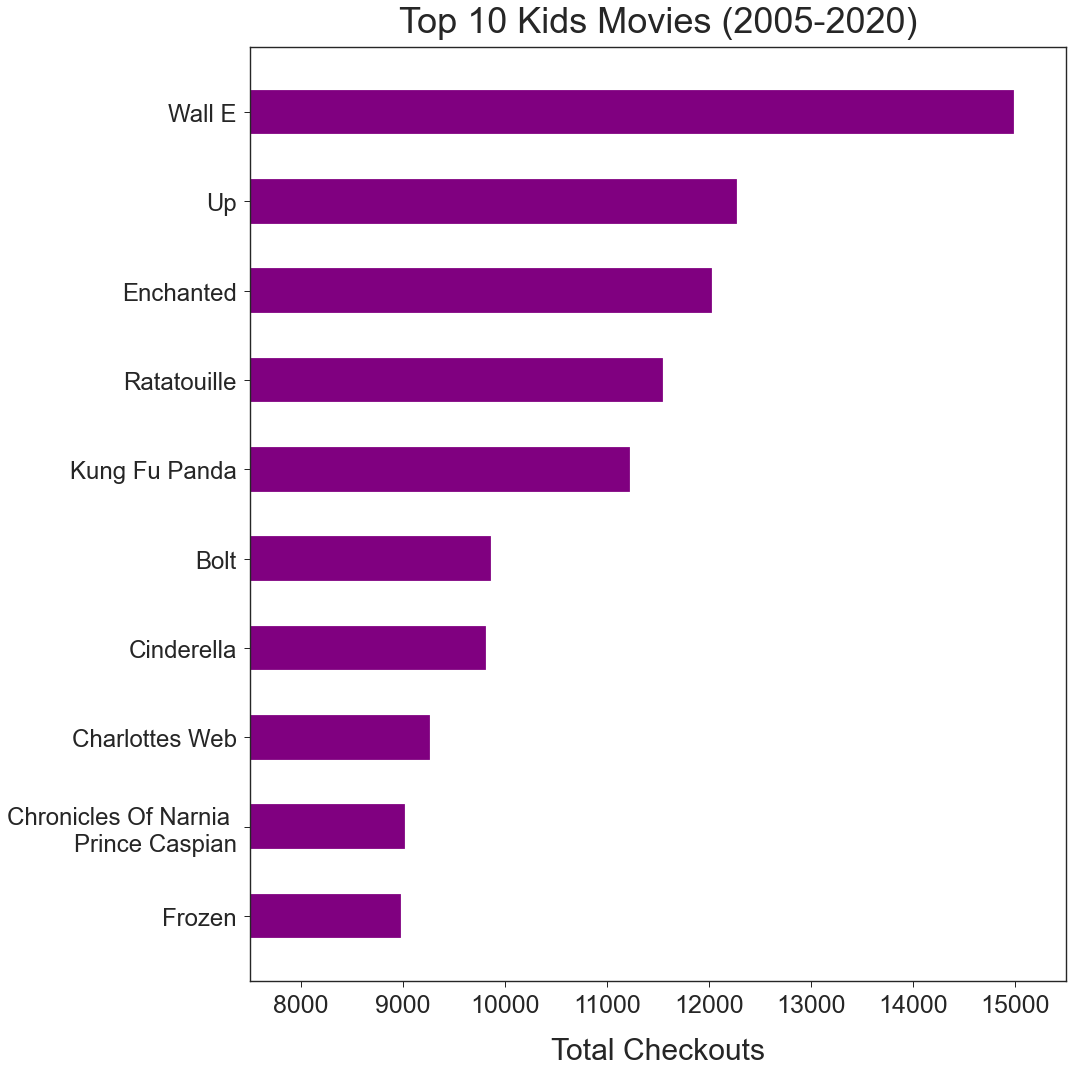

In [39]:
# create labels and prettify the plot
plt.figure(figsize=(15,15))
plt.title('Top 10 Kids Movies (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=7500, right=15500)

# plot top 25 books
plt.barh([name_beautifier(x) for x in top10_kids_movies.index][::-1],
         top10_kids_movies.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/popular_items_eda/top10_kids_movies_hbar.png', 
            bbox_inches='tight', transparent=True)
plt.show()

- WALL-E is a sort of surprise in the top spot! My hunch is that it is a movie that adults also enjoy (because who doesn't love a good crystal ball into our future), so there is influence on what the kids choose to check out.
    - When thinking about it from our (human)perspectives, WALL-E is plainly dystopic, while also managing to be utopic in that we have found a way to live on after destroying the planet... Good, wholesome fun!

#### Top 10 movies - Nonfiction

In [40]:
%%time

# top 10 stats
top10_documentaries = df_full[
                                        (df_full.format_subgroup == 'Video Disc') &
                                        (df_full.category_group == 'Nonfiction')
                                    ].title.value_counts().head(10)

# take a look
top10_documentaries

CPU times: user 11.5 s, sys: 1.29 s, total: 12.8 s
Wall time: 12.9 s


Sicko                                  10764
March of the penguins                   8255
Religulous                              7982
Man on wire                             7722
Food Inc                                6738
inconvenient truth a global warning     6428
Grizzly man                             5467
Inside job                              5028
Jesus camp                              4800
Fahrenheit 9 11                         4421
Name: title, dtype: int64

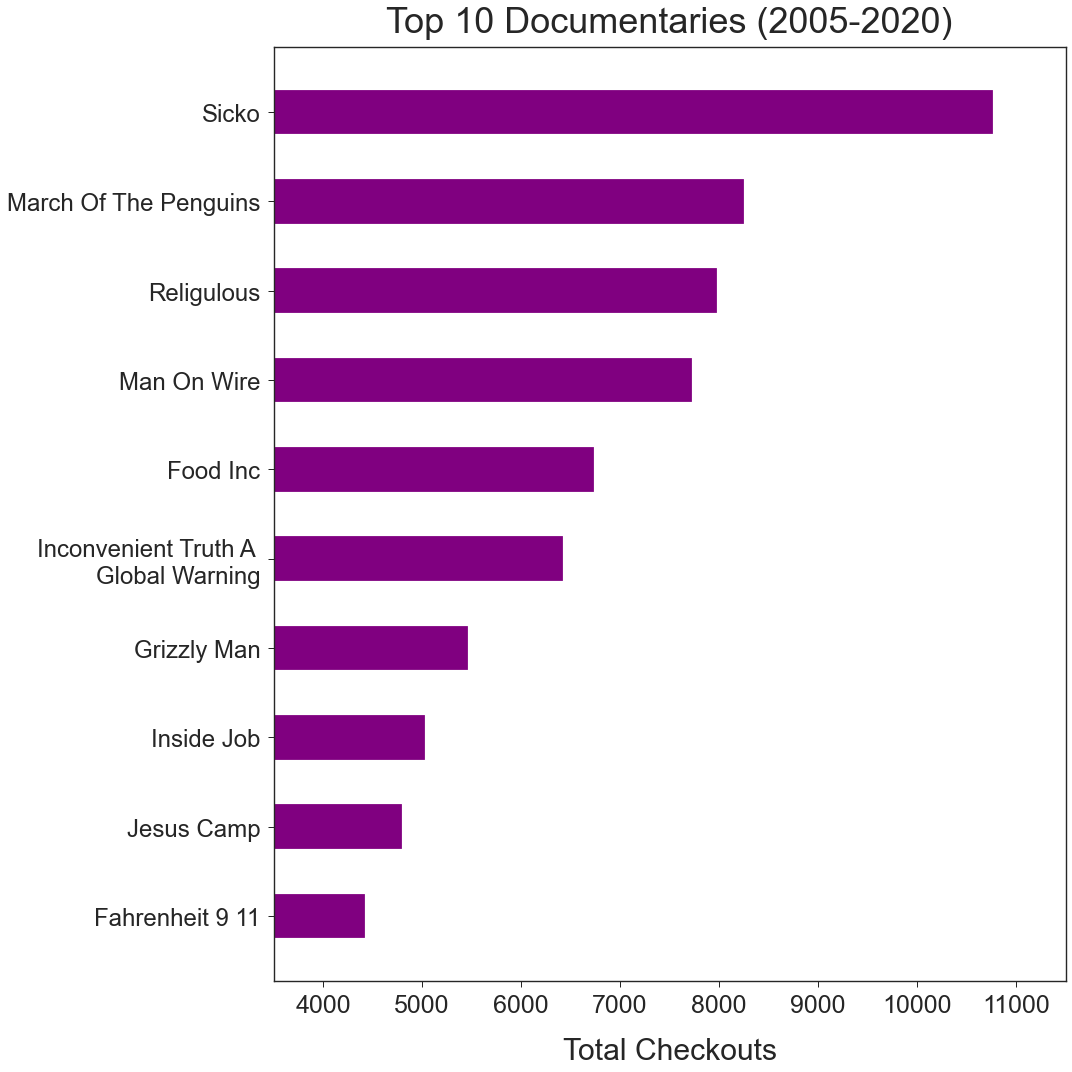

In [41]:
# create labels and prettify the plot
plt.figure(figsize=(15,15))
plt.title('Top 10 Documentaries (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=3500, right=11500)

# plot top 25 books
plt.barh([name_beautifier(x) for x in top10_documentaries.index][::-1],
         top10_documentaries.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/popular_items_eda/top10_documentaries_hbar.png', 
            bbox_inches='tight', transparent=True)
plt.show()

- Michael Moore makes the Top 10 twice, in the #1 and #10 spot.

#### Top 10 VHS tapes

In [42]:
%%time

# top 10 stats
top10_tapes = df_full[(df_full.format_subgroup == 'Video Tape')].title.value_counts().head(10)

# take a look
top10_tapes

CPU times: user 4.6 s, sys: 1.63 s, total: 6.23 s
Wall time: 8.47 s


pianist                  1784
Adaptation               1746
Oceans 11                1696
Moulin Rouge             1679
Chocolat                 1582
Catch me if you can      1576
Bend it like Beckham     1562
beautiful mind           1557
Bowling for Columbine    1511
Hours                    1510
Name: title, dtype: int64

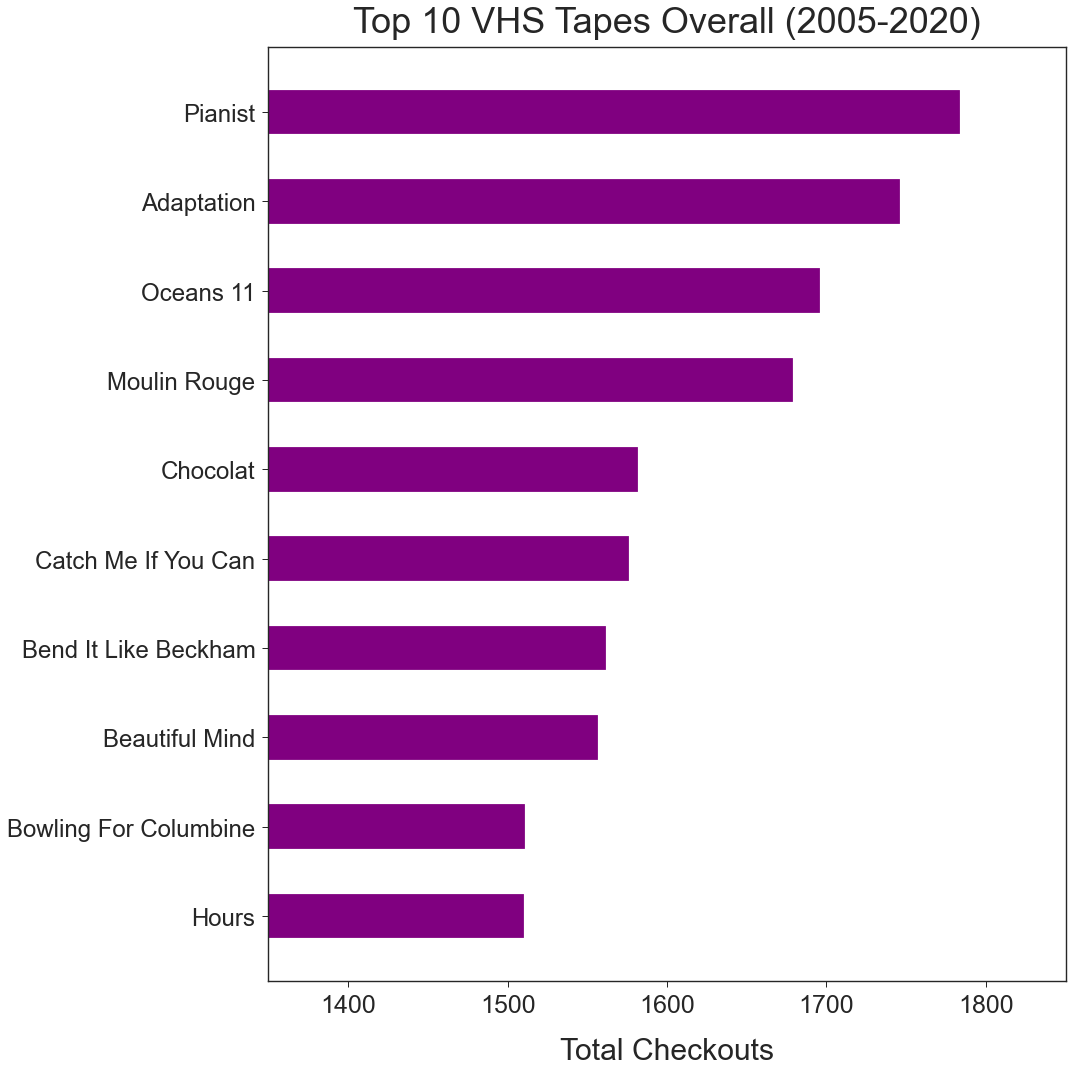

In [43]:
# create labels and prettify the plot
plt.figure(figsize=(15,15))
plt.title('Top 10 VHS Tapes Overall (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=1350, right=1850)

# plot top 10 books
plt.barh([name_beautifier(x) for x in top10_tapes.index][::-1],
         top10_tapes.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/popular_items_eda/top10_tapes_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

I really like this as a snapshot of what folks were watching as DVD and eventually Blu Ray was taking over.

- These are all movies released between 2000 and 2002, including several Best Picture nominees (`Chocolat`, `Moulin Rouge!`, `The Hours`, `The Pianist`) and one winner (`Beautiful Mind`).
    - `Adaptation` received a nomination for Best Original Screenplay (and happens to be one of my favorite movies!)
- Again, Michael Moore makes the list! the only documentary to do so.
- Special shoutout to `Bend It Like Beckham`, which certainly holds a special (albeit polarizing) place in the teen movie zeitgeist.

### Music

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

#### Greatest hits

I noticed that there is a catchall title of `Greatest hits` that refers to CDs across multiple genres, as seen in the snippet below. I'm now curious as to which types of "greatest hits" are most popular in the Seattle Library system.

In [44]:
%%time

# had to sort by date or else it is sorted by format_group and only shows "Print" in the `.head()` view
df_full[df_full.title == 'Greatest hits'].sort_values('date').head(20)

CPU times: user 8.36 s, sys: 18.6 s, total: 27 s
Wall time: 48.2 s


,title,subjects,date,format_group,format_subgroup,category_group,age_group
37002937,Greatest hits,"Rock music 1971 1980, Rock music 1981 1990",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36793193,Greatest hits,"Contemporary Christian music, Gospel music",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36963817,Greatest hits,"Piano music Jazz, Jazz 1921 1930",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36950360,Greatest hits,"Rock music 1971 1980, Rock music 1981 1990, Ro...",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36938769,Greatest hits,"Folk music United States, Folk songs English U...",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36841964,Greatest hits,"Rock music 1971 1980, Rock music 1961 1970",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36931813,Greatest hits,Rock music 1961 1970,2005-04-13,Media,Audio Disc,Nonfiction,Adult
36861318,Greatest hits,"Popular music 1951 1960, Popular music 1961 19...",2005-04-13,Media,Audio Disc,Nonfiction,Adult
70456703,Greatest hits,"Popular music Ireland 1991 2000, Popular music...",2005-04-13,Media,Audio Disc,Nonfiction,Adult
70426267,Greatest hits,Rock music,2005-04-14,Media,Audio Disc,Nonfiction,Adult


I'll subset out entries with this title and clean/combine entries into their applicable genres.

In [45]:
# subset
greatest_hits = df_full[df_full.title == 'Greatest hits']

In [46]:
# list of genres
## NOTE: order is important here
##       "popular" is last so that if any other genre is used, the prior-listed genre will take priority
music_genres = ['gospel', 'soul', 'operas', 'christian', 'reggae', 'humorous', 'orchestral', 
                'childrens', 'jazz', 'folk', 'piano', 'blues', 'country', 'rap', 'rock', 'popular']

In [47]:
# use first word to determine category
conditions_1 = [
    greatest_hits.subjects.str.lower().str.startswith(genre) for genre in music_genres  
]

# use first applicable genre that is found in the string to determine category
conditions_2 = [
    greatest_hits.subjects.str.lower().str.contains(genre) for genre in music_genres 
]

# combine conditions
conditions = conditions_1 + conditions_2

# create labels (x2 to match shape of conditions)
choices = [genre for genre in music_genres] * 2

In [48]:
# transform
greatest_hits['subjects'] = np.select(conditions, choices, 'other')

In [49]:
# obtain counts for each genre
greatest_hits.subjects.value_counts()

rock          41934
popular       14218
rap            5070
country        4604
folk           2432
jazz           2197
soul           1706
piano           770
blues           484
gospel          142
christian       112
operas           87
orchestral       86
childrens        33
humorous         33
reggae           24
Name: subjects, dtype: int64

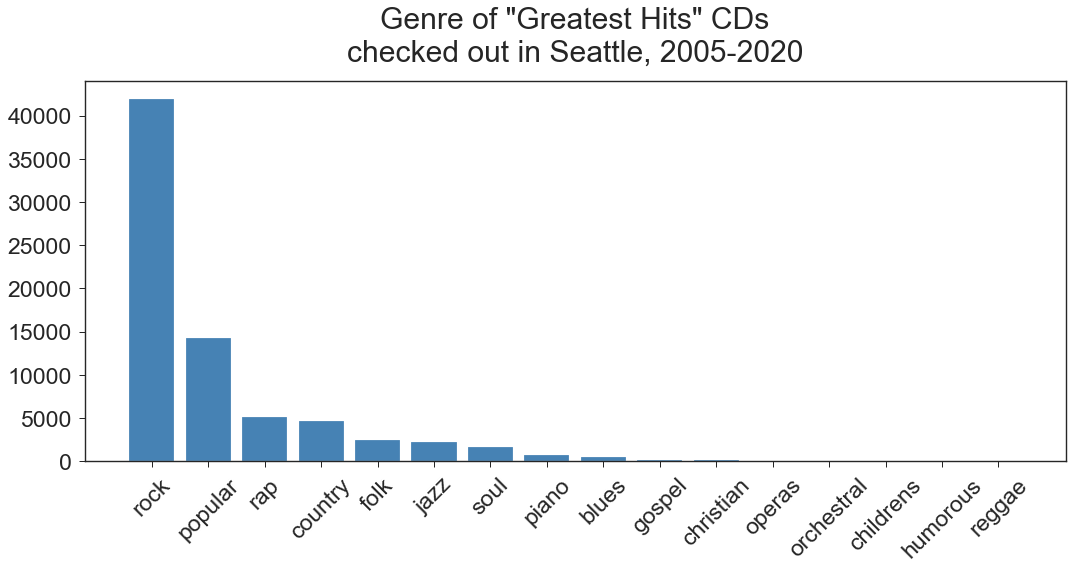

In [50]:
# obtain counts for each genre
col_counts = greatest_hits.subjects.value_counts()

# prettify the plot
plt.figure(figsize=(15,8))
plt.title('Genre of "Greatest Hits" CDs\nchecked out in Seattle, 2005-2020', 
          fontsize=30, pad=20)
plt.ylabel('', fontsize=28, labelpad=15)
plt.xticks(fontsize=23, rotation=45)
plt.yticks(fontsize=23)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/popular_items_eda/greatest_hits_genre_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Perhaps unsurprisingly, rock music has a commanding lead, followed by pop music.
- Rap narrowly edges out country music.
- The bottom five all had fewer than 100 checkouts.

### Equipment

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

The group `Equipment` only accounts for about 0.065% of the data, but I'm still interested in what sorts of items it is comprised of.

In [51]:
# equipment counts
top_equipment = df_full[df_full.format_group == 'Equipment'].title.value_counts()

# take a look
top_equipment

SPL HotSpot connecting Seattle    34395
FlexTech Laptops                  19577
In Building Device Checkout       15399
Uncataloged USB floppy drives        18
Name: title, dtype: int64

- For the purposes of the below graph, I won't include `Uncataloged USB floppy drives` as there are so few checkouts, but I did want to give a quick shout out to one of the most beloved memory storage systems. Go floppy!

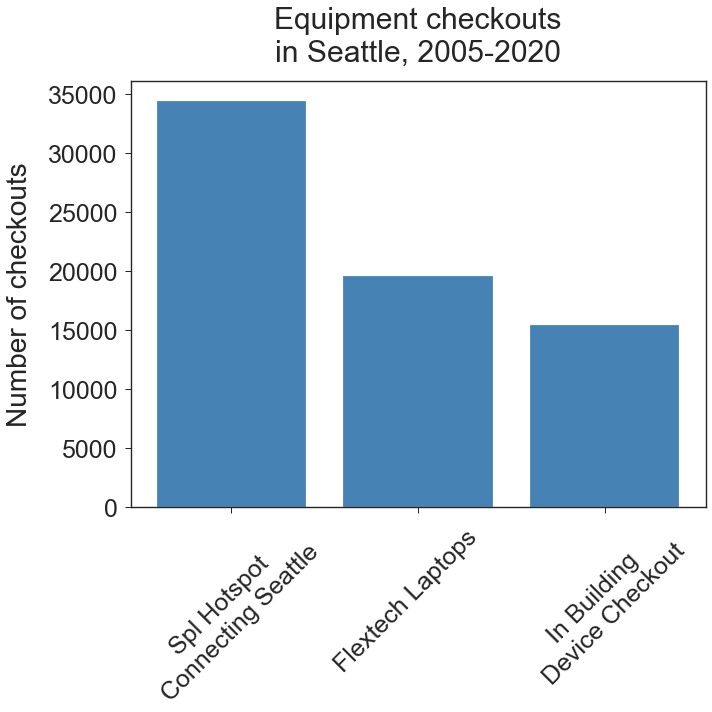

In [52]:
col_counts = df_full[df_full.format_group == 'Equipment'].title.value_counts().head(3)

# create labels and prettify the plot
plt.figure(figsize=(10,10))
plt.title('Equipment checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
plt.suptitle('')
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts', fontsize=28, labelpad=15)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)

# plot counts
plt.bar([name_beautifier(x, 15) for x in col_counts.index], col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/category_eda/equipment_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Most of the equipment appears to be bringing computers and the internet to Seattle residents. If I had to guess, I would say that this also applies to the more general `In Building Device Checkout`.

Now I'll take a look at what is going on in the `Other` format group.

### Other

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

Overall, the group `Other` only accounts for about 0.2% of the data. Still, it is worth exploring what is within the group.

In [53]:
# other counts
top_other = df_full[df_full.format_group == 'Other'].title.value_counts().head(25)

# take a look
top_other

Man of steel                                         724
Girls The complete first season                      390
Sisterland a novel                                   194
Vikings The complete first season                    194
10 things I hate about you                           189
Duck Dodgers Deep space duck                         174
What money cant buy the moral limits of markets      150
Enough said                                          141
good lord bird                                       135
Insidious Chapter 2                                  135
Florida                                              128
Looper                                               110
Django unchained                                      84
Away in a star sled                                   83
Big Sur                                               80
red tent                                              74
third coast when Chicago built the American dream     71
mark of Athena                 

In [54]:
# total number of items with the format group "Unique"
len(df_full[df_full.format_group == 'Other'].title.unique())

94137

- Granted the above is a small snapshot of the entire picture, but it's a bit mysterious as to why these items are marked as `Other`, other than simple clerical errors.
    - I'm seeing mostly movies and tv shows, maybe a book or two (*Sisterland*, and perhaps *Big Sur* by Jack Kerouac perhaps?), as well as a CD (is *Hard Day's Night* the movie or the album?).
- Since there are over 94,000 unique titles *and* the checkout counts are presumably so low for the great majority of them, it's not really worth trying to impute the correct values.

# Next notebook: [Modeling](03_modeling.ipynb)

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

- The next notebook includes time series modeling, forecasts, and breakdowns of seasonality and trends.